**Recommendation System**


  A recommendation system, also known as a recommender system, is a subclass of information filtering systems that seeks to predict the "rating" or "preference" a user would give to an item






**Importing Libraries and Loading**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
#convert text data into numerical features
import matplotlib.pyplot as plt
import seaborn as sns

import google.generativeai as genai

destination_df = pd.read_csv("/content/Expanded_Destinations.csv")
reviews_df = pd.read_csv("/content/Final_Updated_Expanded_Reviews.csv")
userhistory_df = pd.read_csv("/content/Final_Updated_Expanded_UserHistory.csv")
users_df = pd.read_csv("/content/Final_Updated_Expanded_Users.csv")


/usr/local/lib/python3.12/dist-packages/google/colab/_import_hooks/_hook_injector.py:55: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more details:

https://github.com/google-gemini/deprecated-generative-ai-python/blob/main/README.md

  loader.exec_module(module)


In [ ]:
destination_df.head(5)

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun


In [ ]:
reviews_df.head(5)

,ReviewID,DestinationID,UserID,Rating,ReviewText
0,1,178,327,2,Incredible monument!
1,2,411,783,1,Loved the beaches!
2,3,927,12,2,A historical wonder
3,4,358,959,3,Incredible monument!
4,5,989,353,2,Loved the beaches!


In [ ]:
userhistory_df.head(5)

,HistoryID,UserID,DestinationID,VisitDate,ExperienceRating
0,1,525,760,2024-01-01,3
1,2,184,532,2024-02-15,5
2,3,897,786,2024-03-20,2
3,4,470,660,2024-01-01,1
4,5,989,389,2024-02-15,4


In [ ]:
users_df.head(5)

,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,Kavya,kavya@example.com,"Beaches, Historical",Female,1,0
1,2,Rohan,rohan@example.com,"Nature, Adventure",Male,2,2
2,3,Kavya,kavya@example.com,"City, Historical",Female,2,0
3,4,Anika,anika@example.com,"Beaches, Historical",Female,1,0
4,5,Tanvi,tanvi@example.com,"Nature, Adventure",Female,2,2


**Data Preprocessing**


In [ ]:
reviews_destinations = pd.merge(reviews_df,destination_df,on='DestinationID',how='inner')
reviews_destinations.head()

,ReviewID,DestinationID,UserID,Rating,ReviewText,Name,State,Type,Popularity,BestTimeToVisit
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb
2,3,927,12,2,A historical wonder,Goa Beaches,Goa,Beach,7.741214,Nov-Mar
3,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar
4,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar


In [ ]:
reviews_destination_userhistory = pd.merge(reviews_destinations,userhistory_df,on='UserID',how='inner')
reviews_destination_userhistory.head(5)

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2


In [ ]:
df = pd.merge(reviews_destination_userhistory,users_df,on='UserID',how='inner')
df

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,138,131,2024-03-20,1,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
989,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,643,761,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
990,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,454,113,2024-01-01,2,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2
991,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,556,128,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2


In [ ]:
df.shape

(993, 20)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
ReviewID,0
DestinationID_x,0
UserID,0
Rating,0
ReviewText,0
Name_x,0
State,0
Type,0
Popularity,0
BestTimeToVisit,0


In [ ]:
destination_df_unique = destination_df.drop_duplicates(subset=['Name']).reset_index(drop=True)

**Visualization**

/tmp/ipython-input-3686794349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Popularity',y='Name',data=destination_df.sort_values(by='Popularity',ascending=False),palette='viridis')


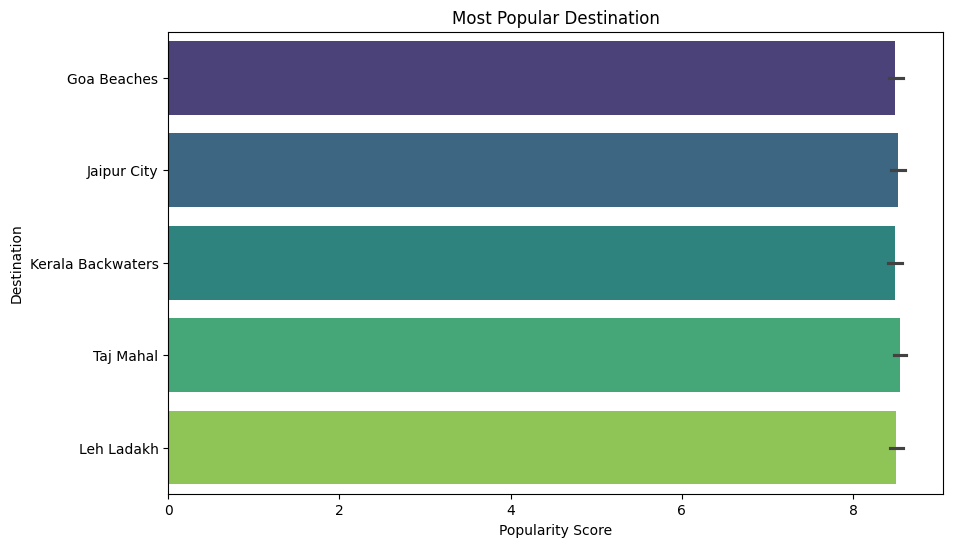

In [ ]:
#1. Destination Popularity
plt.figure(figsize=(10,6))
sns.barplot(x='Popularity',y='Name',data=destination_df.sort_values(by='Popularity',ascending=False),palette='viridis')
plt.title("Most Popular Destination")
plt.xlabel("Popularity Score")
plt.ylabel("Destination")
plt.show()

In [ ]:
destination_df['Type'].value_counts() #to see the frequency of every type of destination

,count
Type,
Historical,200
Beach,200
City,200
Nature,200
Adventure,200


/tmp/ipython-input-1744554881.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Type',data=destination_df,order=destination_df['Type'].value_counts().index,palette='coolwarm')


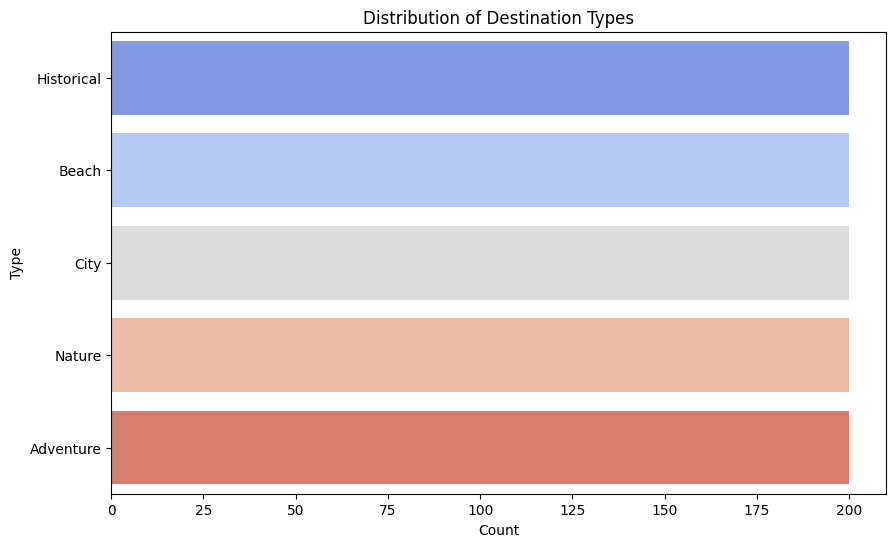

In [ ]:
#2. Destination Types Distribution
plt.figure(figsize=(10,6))
#countplot shows distribution/count
sns.countplot(y='Type',data=destination_df,order=destination_df['Type'].value_counts().index,palette='coolwarm')
plt.title('Distribution of Destination Types')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

/tmp/ipython-input-999543745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='BestTimeToVisit',data=destination_df,order=destination_df['BestTimeToVisit'].value_counts().index,palette='rocket')


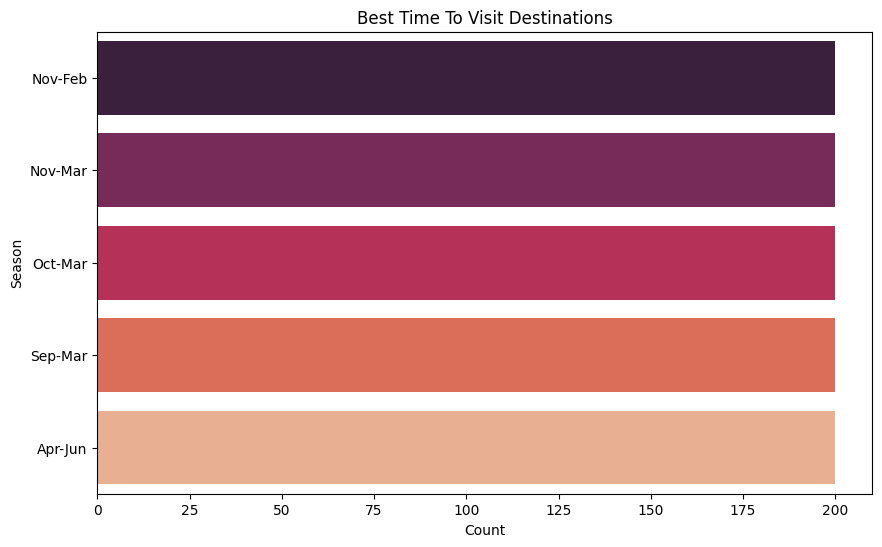

In [ ]:
#3. Best time to Visit Distribution
plt.figure(figsize=(10,6))
sns.countplot(y='BestTimeToVisit',data=destination_df,order=destination_df['BestTimeToVisit'].value_counts().index,palette='rocket')
plt.title('Best Time To Visit Destinations')
plt.xlabel('Count')
plt.ylabel('Season')
plt.show()

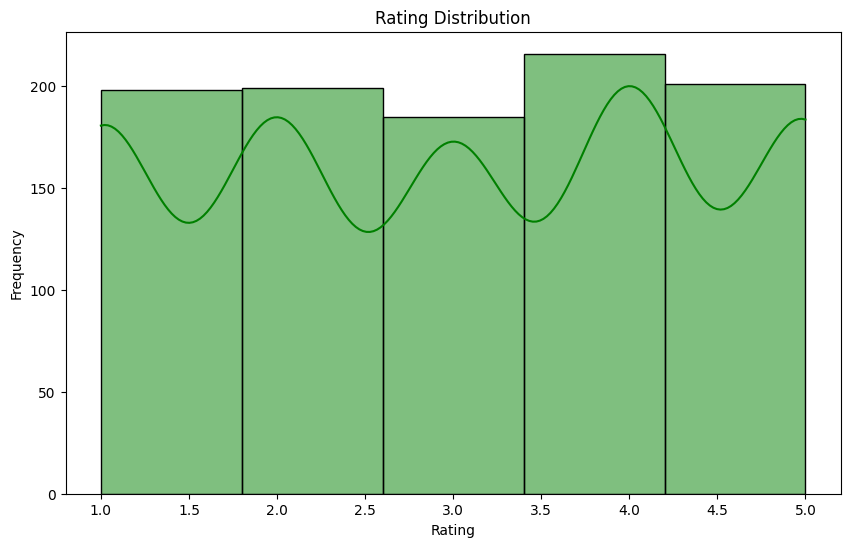

In [ ]:
#4. Rating Distribution
plt.figure(figsize=(10,6))
sns.histplot(reviews_df['Rating'],bins=5,kde=True,color='green')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Content-Based Recommendatioon Model**

Content-based filtering is a recommendation technique that suggests items to users by analyzing the features or attributes of items they've previously liked or interacted with, matching them to similar items based on content similarity rather than other users' behavior

In [ ]:
df

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,138,131,2024-03-20,1,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
989,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,643,761,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
990,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,454,113,2024-01-01,2,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2
991,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,556,128,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2


In [ ]:
#making an array of features so that we can find the similarities for content based filtering
#so that we can find similarities between them easily
df['features'] = df['Type']+" "+ df['State']+" "+ df['BestTimeToVisit']+" "+ df['Preferences']

In [ ]:
df

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,...,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren,features
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,...,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1,"City Rajasthan Oct-Mar City, Historical"
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,...,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1,"Historical Uttar Pradesh Nov-Feb City, Historical"
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,...,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1,"City Rajasthan Oct-Mar Nature, Adventure"
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,...,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0,"Nature Kerala Sep-Mar Nature, Adventure"
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,...,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0,"City Rajasthan Oct-Mar City, Historical"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,...,131,2024-03-20,1,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
989,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,...,761,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
990,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,...,113,2024-01-01,2,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
991,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,...,128,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."


In [ ]:
df['features']

,features
0,"City Rajasthan Oct-Mar City, Historical"
1,"Historical Uttar Pradesh Nov-Feb City, Historical"
2,"City Rajasthan Oct-Mar Nature, Adventure"
3,"Nature Kerala Sep-Mar Nature, Adventure"
4,"City Rajasthan Oct-Mar City, Historical"
...,...
988,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
989,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
990,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
991,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."


In [ ]:
#vectorization -> basically a vector in which a perticular number is given to every word in a sentence
vectorizer = TfidfVectorizer(stop_words='english')

destination_features = vectorizer.fit_transform(df['features'])
#destination_features.toarray()
cosine_sim = cosine_similarity(destination_features,destination_features)

In [ ]:
cosine_sim
# one element -> an array of similarity with every other for every feature
#every item similarity with every 992 items

array([[1.        , 0.30209204, 0.80314548, ..., 0.10628488, 0.10628488,
        1.        ],
       [0.30209204, 1.        , 0.10568682, ..., 0.89329488, 0.89329488,
        0.30209204],
       [0.80314548, 0.10568682, 1.        , ..., 0.        , 0.        ,
        0.80314548],
       ...,
       [0.10628488, 0.89329488, 0.        , ..., 1.        , 1.        ,
        0.10628488],
       [0.10628488, 0.89329488, 0.        , ..., 1.        , 1.        ,
        0.10628488],
       [1.        , 0.30209204, 0.80314548, ..., 0.10628488, 0.10628488,
        1.        ]])

In [ ]:
#Recommendation Function
#Based on the cosine similarity matrix, we can recommend destinations similar to the ones the user has liked in the past

def recommend_destinations(user_id,userhistory_df,destination_df,cosine_sim):

  #getting the destinations that user has already visited
  visited_destinations = userhistory_df[userhistory_df['UserID']==user_id]['DestinationID'].values

  #calculating similarity scores for visited destinations
  #Sum similarity scores column-wise
  similar_scores = np.sum(cosine_sim[visited_destinations - 1],axis=0)

  #recommending top five destinations where user hasn't visited
  recommended_destinations_idx = np.argsort(similar_scores)[::-1]

  recommendations = []
  #to get the destinations where user has not visited
  for idx in recommended_destinations_idx:
    if destination_df.iloc[idx]['DestinationID'] not in visited_destinations:
      #top recommendations
      recommendations.append(destination_df.iloc[idx][['DestinationID','Name','Type','BestTimeToVisit']].to_dict())
    if len(recommendations) >= 5:
      break


  return pd.DataFrame(recommendations)

In [ ]:
recommended_destinations = recommend_destinations(10,userhistory_df,destination_df,cosine_sim)
recommended_destinations

,DestinationID,Name,Type,BestTimeToVisit
0,1,Taj Mahal,Historical,Nov-Feb
1,17,Goa Beaches,Beach,Nov-Mar
2,18,Jaipur City,City,Oct-Mar
3,19,Kerala Backwaters,Nature,Sep-Mar
4,20,Leh Ladakh,Adventure,Apr-Jun


**Collaborative** **Filtering**


It is a recommendation technique that predicts a user's preferences based on the preferences of similar users or items.

In [ ]:
df.columns

Index(['ReviewID', 'DestinationID_x', 'UserID', 'Rating', 'ReviewText',
       'Name_x', 'State', 'Type', 'Popularity', 'BestTimeToVisit', 'HistoryID',
       'DestinationID_y', 'VisitDate', 'ExperienceRating', 'Name_y', 'Email',
       'Preferences', 'Gender', 'NumberOfAdults', 'NumberOfChildren',
       'features'],
      dtype='object')

In [ ]:
#creating user-item matrix
user_item_matrix = userhistory_df.pivot(index='UserID',columns='DestinationID',values='ExperienceRating')
user_item_matrix.fillna(0,inplace=True)
user_similarity = cosine_similarity(user_item_matrix)

In [ ]:
user_similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
    #now computing the cosine similarity between users based on the user-item matrix

def collaborative_recommand(user_id,user_similarity,user_item_matrix,destination_df):
  #find similar users
  similar_users = user_similarity[user_id-1]  #as userID starts from 0

  #get 5 similar users
  similar_users_idx = np.argsort(similar_users)[::-1][1:6]

  #destination liked by similar users
  similar_user_ratings = user_item_matrix.iloc[similar_users_idx].mean(axis=0)

  recommended_destinations_ids = similar_user_ratings.sort_values(ascending=False).head(5).index

  #recommend top 5 items
  recommendations = destination_df[destination_df['DestinationID'].isin(recommended_destinations_ids)][['DestinationID','Name','State','Popularity','BestTimeToVisit']]

  return recommendations

In [ ]:
collaborative_recommendations = collaborative_recommand(15,user_similarity,user_item_matrix,destination_df)

collaborative_recommendations

,DestinationID,Name,State,Popularity,BestTimeToVisit
5,6,Taj Mahal,Uttar Pradesh,7.648950,Nov-Feb
435,436,Taj Mahal,Uttar Pradesh,7.728114,Nov-Feb
519,520,Leh Ladakh,Jammu and Kashmir,8.521876,Apr-Jun
684,685,Leh Ladakh,Jammu and Kashmir,7.598827,Apr-Jun
784,785,Leh Ladakh,Jammu and Kashmir,9.366933,Apr-Jun


**User Input feature based recommendation**

In [ ]:

df #here by seeing popularity it is a regression problem

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,...,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren,features
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,...,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1,"City Rajasthan Oct-Mar City, Historical"
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,...,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1,"Historical Uttar Pradesh Nov-Feb City, Historical"
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,...,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1,"City Rajasthan Oct-Mar Nature, Adventure"
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,...,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0,"Nature Kerala Sep-Mar Nature, Adventure"
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,...,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0,"City Rajasthan Oct-Mar City, Historical"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,...,131,2024-03-20,1,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
989,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,...,761,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
990,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,...,113,2024-01-01,2,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
991,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,...,128,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor #using regressor for continuous target
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

#Load and preprocess the data
data = df.copy()

In [ ]:
df.columns

Index(['ReviewID', 'DestinationID_x', 'UserID', 'Rating', 'ReviewText',
       'Name_x', 'State', 'Type', 'Popularity', 'BestTimeToVisit', 'HistoryID',
       'DestinationID_y', 'VisitDate', 'ExperienceRating', 'Name_y', 'Email',
       'Preferences', 'Gender', 'NumberOfAdults', 'NumberOfChildren',
       'features'],
      dtype='object')

In [ ]:
#selecting relevant features
features = ['Name_x','State','Type','BestTimeToVisit','Preferences','Gender','NumberOfAdults','NumberOfChildren']
target = 'Popularity'   #predicting popularity

In [ ]:
df[features]

,Name_x,State,Type,BestTimeToVisit,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,Jaipur City,Rajasthan,City,Oct-Mar,"City, Historical",Female,1,1
1,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"City, Historical",Male,1,1
2,Jaipur City,Rajasthan,City,Oct-Mar,"Nature, Adventure",Male,1,1
3,Kerala Backwaters,Kerala,Nature,Sep-Mar,"Nature, Adventure",Female,2,0
4,Jaipur City,Rajasthan,City,Oct-Mar,"City, Historical",Male,2,0
...,...,...,...,...,...,...,...,...
988,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,0
989,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,0
990,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,2
991,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,2


In [ ]:
#Encoding (label encoding)
#to store LabelEncoder objects
label_encoders = {}

for col in features:
  if data[col].dtype == 'object':
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
data[features]

,Name_x,State,Type,BestTimeToVisit,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,3,2,3,1,0,1,1
1,4,4,3,1,1,1,1,1
2,1,3,2,3,2,1,1,1
3,2,2,4,4,2,0,2,0
4,1,3,2,3,1,1,2,0
...,...,...,...,...,...,...,...,...
988,4,4,3,1,0,1,2,0
989,4,4,3,1,0,1,2,0
990,4,4,3,1,0,1,2,2
991,4,4,3,1,0,1,2,2


In [ ]:
X = data[features]
y = data[target]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [ ]:
X.shape,y.shape

((993, 8), (993,))

In [ ]:
#Training model

model = RandomForestRegressor(random_state=42)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print("MSE :", mean_squared_error(y_test,y_pred))
#Lower MSE → predictions are closer to actual values

MSE : 0.30215968785605185


In [ ]:
def recommend_destinations(user_input,model,label_encoders,features,data):
  #Encode user input
  encoded_input = {}
  for feature in features:
    if feature in label_encoders:
      encoded_input[feature] = label_encoders[feature].transform([user_input[feature]])[0]
    else:
      encoded_input[feature] = user_input[feature]

  #coverting dataframe
  input_df = pd.DataFrame([encoded_input])

  #predict popularity
  predicted_popularity = model.predict(input_df)[0]

  return predicted_popularity


In [ ]:
features

['Name_x',
 'State',
 'Type',
 'BestTimeToVisit',
 'Preferences',
 'Gender',
 'NumberOfAdults',
 'NumberOfChildren']

In [ ]:
#example user input
user_input = {
    'Name_x':'Jaipur City',
    'Type':'City',
    'State':'Rajasthan',
    'BestTimeToVisit':'Oct-Mar',
    'Preferences': 'City, Historical',
    'Gender':'Female',
    'NumberOfAdults':2,
    'NumberOfChildren':1,
}

#Make a prediction
predicted_popularity = recommend_destinations(user_input,model,label_encoders,features,data)

#Print the predicted popularity and the recommended destination details
print(f"Predicted Popularity Score: {predicted_popularity:.2f}")

Predicted Popularity Score: 7.88


In [ ]:
import pickle

pickle.dump(model,open("model.pkl",'wb'))
pickle.dump(label_encoders,open("label_encoders.pkl",'wb'))